<a href="https://colab.research.google.com/github/Vamshidhar2004/Lung-cancer-prediction-using-ml/blob/main/Lung_Cancer_Preoject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn import tree


In [ ]:
print("Dataset:")
dataset = pd.read_csv("/content/Cancer2.csv")
print(len(dataset))
print(dataset.head())



Dataset:
1000
    Name  Age  Alkhol  Smokes  AreaQ  Result
0     P1   33       4       3      2       0
1    P10   17       1       2      7       2
2   P100   35       5       2      9       1
3  P1000   37       7       7      3       1
4   P101   46       8       8      4       1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


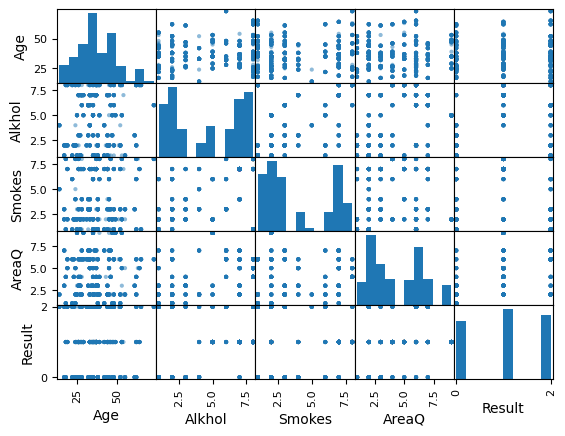

In [ ]:
scatter_matrix(dataset)
plt.show()



In [ ]:
A = dataset[dataset.Result == 1]
B = dataset[dataset.Result == 0]
C = dataset[dataset.Result == 2]


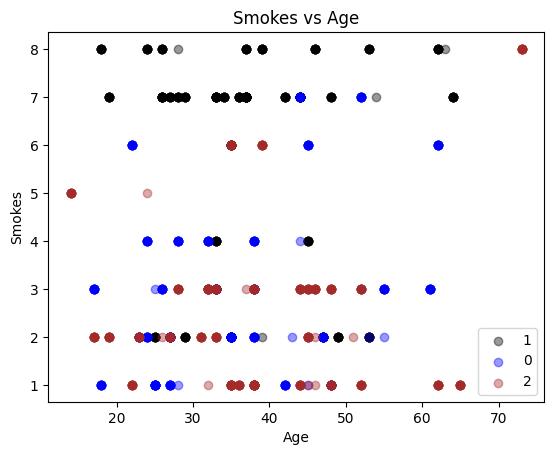

In [ ]:
plt.scatter(A.Age, A.Smokes, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Smokes, color="Blue", label="0", alpha=0.4)
plt.scatter(C.Age, C.Smokes, color="Brown", label="2", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")
plt.show()


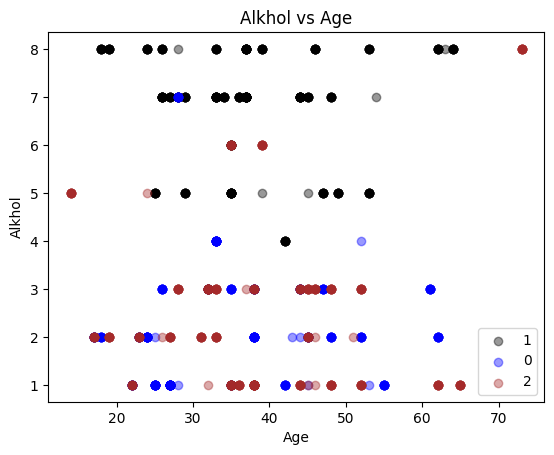

In [ ]:
plt.scatter(A.Age, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.scatter(C.Age, C.Smokes, color="Brown", label="2", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Age")
plt.show()


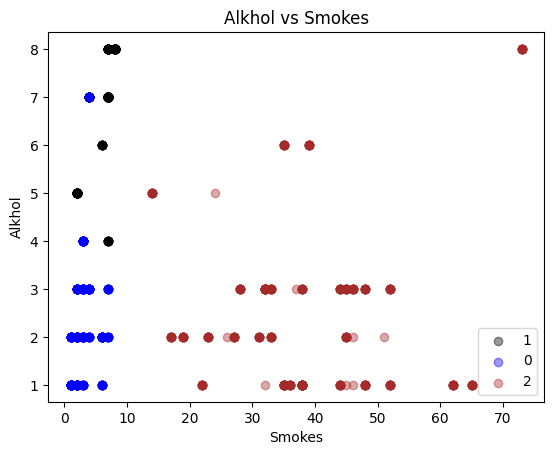

In [ ]:
plt.scatter(A.Smokes, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Smokes, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.scatter(C.Age, C.Smokes, color="Brown", label="2", alpha=0.4)
plt.xlabel("Smokes")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Smokes")
plt.show()


# Split dataset

In [ ]:
X = dataset.iloc[:, 3:5]
y = dataset.iloc[:, 5]
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)


#Feature Scaling

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


In [ ]:
print("--Using KNN Algorithm--")


--Using KNN Algorithm--


In [ ]:
import math
a = math.sqrt(len(y_train))
print(a)


28.284271247461902


In [ ]:
# Defining a model - KNN
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')



In [ ]:
# Fit model
classifier.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
# Predict the test set result
y_pred = classifier.predict(x_test)
print(y_pred)


[1 2 2 1 2 2 2 2 2 2 0 1 2 1 1 0 1 2 0 2 1 0 1 1 1 1 0 1 1 2 1 0 0 1 2 2 2
 2 1 0 2 1 2 2 2 2 0 1 1 2 1 2 2 1 2 2 0 0 1 1 0 1 1 1 2 2 0 1 1 1 2 2 2 2
 0 0 0 2 2 1 0 2 0 1 1 2 0 2 0 1 2 0 1 0 2 0 2 1 2 1 2 1 2 0 1 2 1 2 2 1 1
 1 1 2 2 0 2 0 0 2 1 2 1 1 2 2 0 0 2 0 2 2 0 0 1 2 0 2 2 1 2 2 2 2 0 1 2 2
 0 2 0 1 2 1 1 1 0 2 2 0 2 1 1 1 0 0 1 0 1 2 1 1 2 0 0 2 1 1 1 2 1 1 1 1 1
 2 2 0 1 1 1 0 1 1 1 2 0 1 1 0]


In [ ]:
# Evaluate model
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)


Confusion Matrix: 
[[47  1 19]
 [ 0 75  0]
 [ 0  0 58]]


In [ ]:
print("In Confusion Matrix:-----")
print("Position 1.1 shows the patients that don't have Cancer, In this case =", cm[0, 0])
print("Position 1.2 shows the number of patients that have higher risk of Cancer, In this case =", cm[0, 1])
print("Position 2.1 shows the Incorrect Value, In this case =", cm[1, 0])
print("Position 2.2 shows the correct number of patients that have Cancer, In this case =", cm[1, 1])


In Confusion Matrix:-----
Position 1.1 shows the patients that don't have Cancer, In this case = 47
Position 1.2 shows the number of patients that have higher risk of Cancer, In this case = 1
Position 2.1 shows the Incorrect Value, In this case = 0
Position 2.2 shows the correct number of patients that have Cancer, In this case = 75


In [ ]:
print('F1 Score (macro):', f1_score(y_test, y_pred, average='macro')) # Use 'macro' averaging for multiclass
print('Accuracy:', accuracy_score(y_test, y_pred))

F1 Score (macro): 0.8923993820705799
Accuracy: 0.9


In [ ]:
# Using Decision tree
print("----")
print("Using Decision Tree Algorithm")


----
Using Decision Tree Algorithm


In [ ]:
c = tree.DecisionTreeClassifier()
c.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
accu_train = np.sum(c.predict(x_train) == y_train) / float(y_train.size)
accu_test = np.sum(c.predict(x_test) == y_test) / float(y_test.size)


In [ ]:
print('Classification accuracy on train', accu_train * 100)
print('Classification accuracy on test', accu_test*100)

Classification accuracy on train 91.0
Classification accuracy on test 90.0


In [ ]:
# Function to take input and predict
def predict_lung_cancer(age, smokes, alkhol):
    input_data = np.array([[smokes, alkhol]])
    input_data = sc_x.transform(input_data)

    knn_prediction = classifier.predict(input_data)
    tree_prediction = c.predict(input_data)

    return knn_prediction[0], tree_prediction[0]


In [ ]:
# Taking input from the user
age = float(input("Enter Age: "))
smokes = float(input("Enter Smokes: "))
alkhol = float(input("Enter Alkhol: "))

In [ ]:
knn_result, tree_result = predict_lung_cancer(age, smokes, alkhol)
print(f"KNN Prediction: {'Cancer' if knn_result == 1 else 'No Cancer'}")

KNN Prediction: No Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
